<a href="https://colab.research.google.com/github/kaydenlea/numberreader/blob/main/numberreader.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data() #splitting trainign and test data

x_train = tf.keras.utils.normalize(x_train, axis=1 )
x_test = tf.keras.utils.normalize(x_test, axis=1 ) #normalize data, scaling data down, dont need to scale down y

#define the model

model = tf.keras.models.Sequential()
#add layers
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(units=128, activation = tf.nn.relu)) # add neurons
model.add(tf.keras.layers.Dense(units=128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(units=10, activation=tf.nn.softmax)) #scales down valeus so that it adds up to 1

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)

loss, accuracy = model.evaluate(x_test, y_test)
print(accuracy)
print(loss)

model.save('digits.model')




11501568/11490434 [==============================] - 0s 0us/step
Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2636 - accuracy: 0.9227
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1090 - accuracy: 0.9665
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0752 - accuracy: 0.9764
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0552 - accuracy: 0.9823
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0937 - accuracy: 0.9740
0.9739999771118164
0.09374857693910599
INFO:tensorflow:Assets written to: digits.model/assets


This looks like a: 6


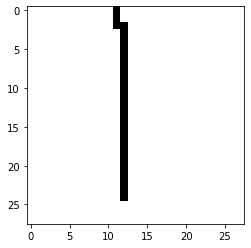

This looks like a: 2


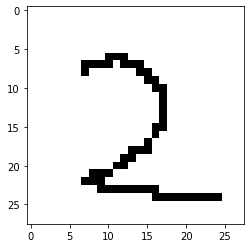

This looks like a: 3


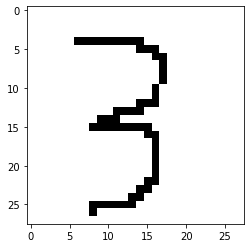

This looks like a: 9


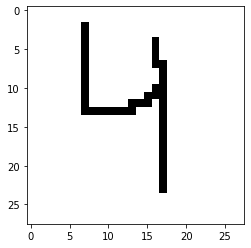

This looks like a: 2


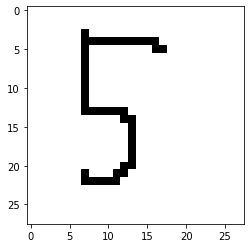

In [ ]:
for x in range(1,6):
  img = cv.imread(f'{x}.png')[:,:,0]
  img = np.invert(np.array([img]))
  prediction = model.predict(img)
  print(f'This looks like a: {np.argmax(prediction)}')
  plt.imshow(img[0],cmap=plt.cm.binary)
  plt.show()